# KNN, MLP and SVM

In [1]:
%pylab inline
figsize(10, 8)
import wget

Populating the interactive namespace from numpy and matplotlib


## Classification with k-nearest neighbours

In this section of the workshop you will use a k-nearest neighbours classifier to first classify some two-dimensional data that can be easily plotted.  After that we'll try it on a more complicated dataset.



Download and load the data in from two files.  The first file contains 250 data points for training data (and validation), while the second contains 1000 points for testing. There are lots of testing points which will allow you to assess how well a classifier is performing.

In [2]:
import random

def get_gmm5Data(sampleSize = None):
    
    try: 
        train = loadtxt('gmm5train.txt')
    except IOError:
        wget.download('http://empslocal.ex.ac.uk/~reverson/ECMM422/gmm5train.txt')
        train = loadtxt('gmm5train.txt')

    try: 
        test = loadtxt('gmm5test.txt')
    except IOError:
        wget.download('http://empslocal.ex.ac.uk/~reverson/ECMM422/gmm5test.txt')
        test = loadtxt('gmm5test.txt')
        
    if sampleSize is not None:
        
        indexes = indexes = list(range(1,shape(train)[0]))
        random.shuffle(indexes)
        permutation = indexes[:sampleSize]
        
        return train[permutation,:2], train[permutation,2], test[:,:2], test[:,2]
        
    return train[:,:2], train[:,2], test[:,:2], test[:,2]

# Separate the train and testing data into features (Xtr, Xte) 
# and targets (ttr, tte)
Xtr, ttr, Xte, tte = get_gmm5Data()

Plot the data as two classes.  It's clear that it cannot be completely separated by a straight line, so these data are said not to be "linearly separable".

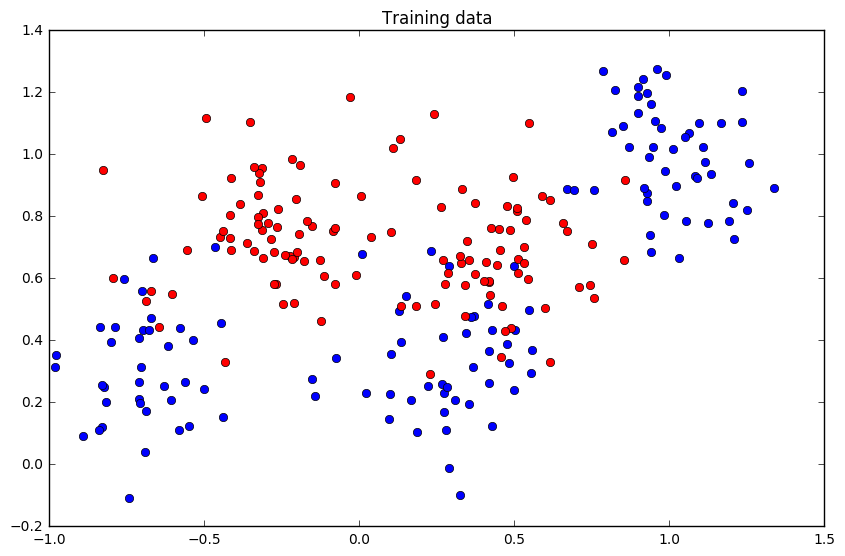

In [3]:
plot(Xtr[ttr==0, 0], Xtr[ttr==0, 1], 'bo')
plot(Xtr[ttr==1, 0], Xtr[ttr==1, 1], 'ro')
axis('scaled')
title('Training data')

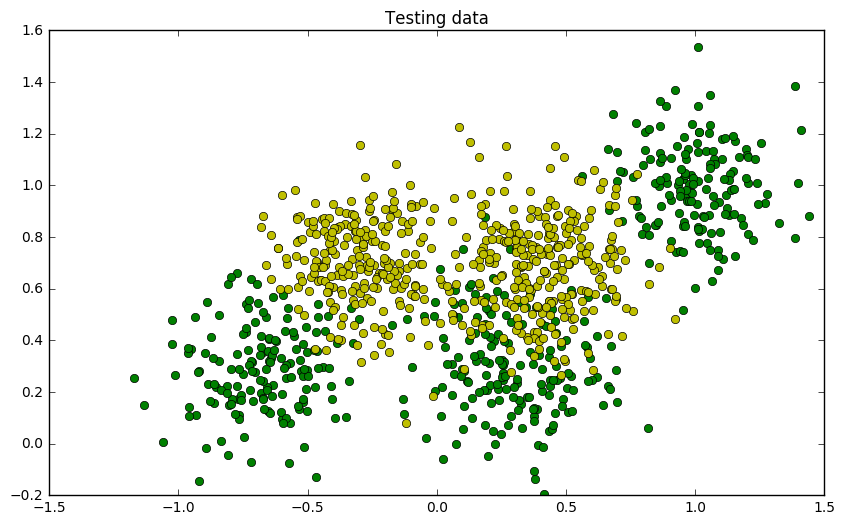

In [4]:
plot(Xte[tte==0, 0], Xte[tte==0,1], "go")
plot(Xte[tte==1, 0], Xte[tte==1,1], "yo")
axis('scaled')
title('Testing data')

We will use the k-nearest neighbour classifier from scikit learn, which is  quite an extensive implementation of various machine learning algorithms.

In [5]:
from sklearn import neighbors

In the follwing cell, we will set up a grid of points to be classified over the whole domain and then classify them with the k-nn classifier, plotting the result in the corresponding place on the grid.  This gives a nice visualisation of the classfier's performance.

To start off, we use **all** the training data.

(-1.0, 1.5, -0.20000000000000001, 1.3999999999999999)

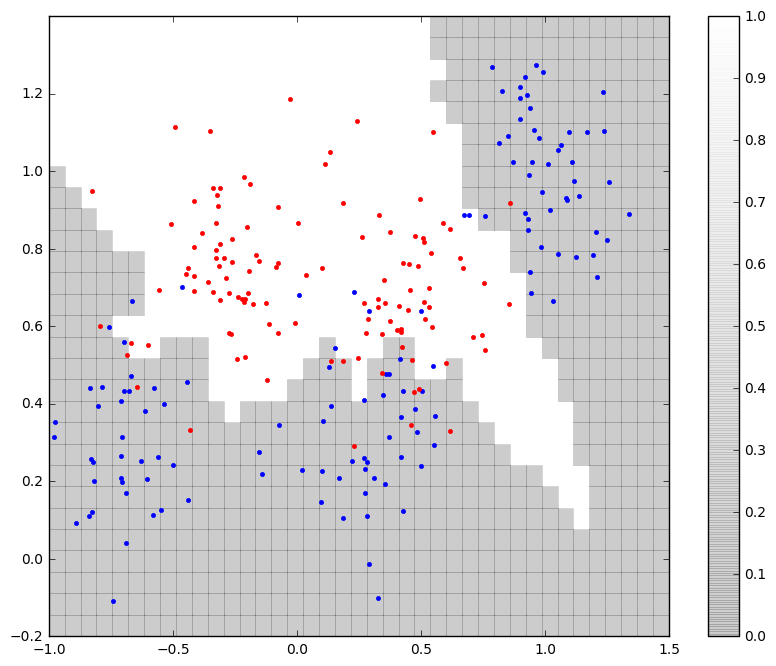

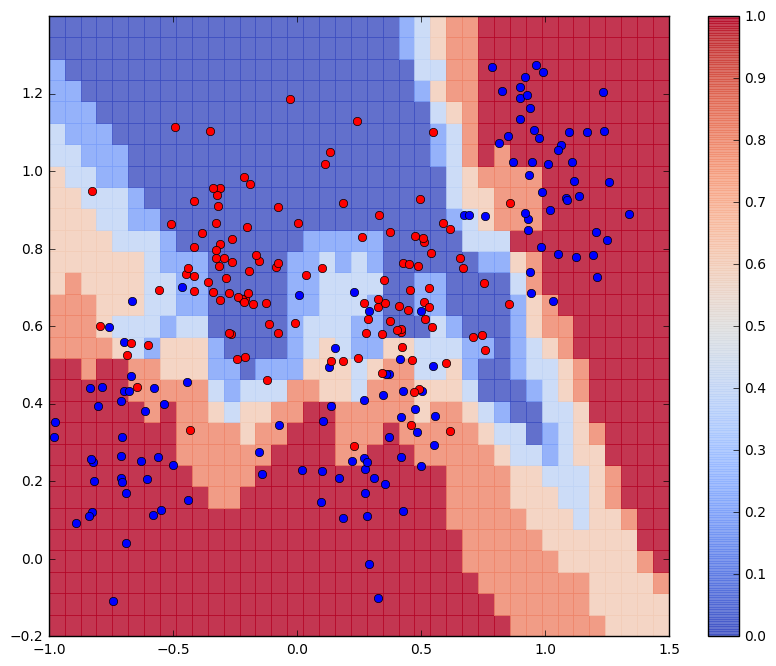

In [6]:
k = 5   # Choose the number of nearest neighbours

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtr, ttr)

# Plot the prediction by the classifier of the class probability 
# (estimated from the fraction of points of each class in the k
# nearest neighbours) for data on a grid.  

N, M = 40, 30   # Make these larger to get a smoother picture

X = linspace(-1.0, 1.5, N)
Y = linspace(-0.2, 1.4, M)
pred = zeros((M,N))
prob = zeros((M,N,2))
# Writing this double loop is not very efficient, but it is clear.
for ny, y in enumerate(Y):
    for nx, x in enumerate(X):
        pred[ny, nx] = knn.predict([[x, y]])          # Predict expects a matrix of features
        prob[ny, nx, :] = knn.predict_proba([[x, y]]) # Probabilities of belonging to one class
pcolor(X, Y, pred, cmap=cm.gray, alpha=0.2)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
axis('tight')

# Plot the probabilites of belonging to the 1 class.
figure()
pcolor(X, Y, prob[:,:,0], cmap=cm.coolwarm, alpha=0.8)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'bo')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'ro')
axis('tight')


### Validation

Above we used all the training data and guessed the value of $k$. Much better is to estimate the optimum value of $k$, but dividing the training data into a training and a validation set; the generalisation error is then estimated on the validation set and the $k$ giving the minimum error is used for making predictions about unknown data.

Better than just dividing the training data into two is to use $k$ fold cross validation (don't confuse the $k$ in $k$ cross validation with the $k$ in $k$ nearest neighbours!

The following cell shows how the sklearn routines may be used to produce training and validation sets automatically. More information at <http://scikit-learn.org/stable/modules/cross_validation.html>.  Don't worry about the deprecation warnings!

In [7]:
from sklearn.cross_validation import KFold

# Make our 'training data' of 10 examples, each of two columns.
# These have just got integers in so that you can easily see which 
# examples have been selected.
X = vstack((arange(10), arange(10))).T + 10
t = arange(10)+100   # Targets
print("Features")
print(X)
print("Targets")
print(t)
print()
print()

cv = KFold(len(t), n_folds=len(t))    # 5 fold CV here.

fold = 0
for train, validation in cv:
    print('-------- Fold', fold)
    print('Train')
    print(X[train])
    print(t[train])
    print('Test')
    print(X[validation])
    print(t[validation])
    fold += 1
    # Notice that each training set consists of 8 of the 10 examples 
    # and the validation set is the remaining 2.
    # You should train the model with X[train] and t[train]
    # and estimate the generalisation error on X[validation] and 
    # t[validation].  Don't forget to average the validation error 
    # over all the folds


Features
[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
Targets
[100 101 102 103 104 105 106 107 108 109]


-------- Fold 0
Train
[[11 11]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[101 102 103 104 105 106 107 108 109]
Test
[[10 10]]
[100]
-------- Fold 1
Train
[[10 10]
 [12 12]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[100 102 103 104 105 106 107 108 109]
Test
[[11 11]]
[101]
-------- Fold 2
Train
[[10 10]
 [11 11]
 [13 13]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[100 101 103 104 105 106 107 108 109]
Test
[[12 12]]
[102]
-------- Fold 3
Train
[[10 10]
 [11 11]
 [12 12]
 [14 14]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[100 101 102 104 105 106 107 108 109]
Test
[[13 13]]
[103]
-------- Fold 4
Train
[[10 10]
 [11 11]
 [12 12]
 [13 13]
 [15 15]
 [16 16]
 [17 17]
 [18 18]
 [19 19]]
[100 101 102 103 105 106 107 108 109]
Test
[[14 14]]
[104]
-------- Fold 5
Train
[[10 10]
 [

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Make a plot of the training and validation errors as $k$ varies from 1 to, say, 50.  Here, just use the number of misclassified samples as the error, but you could also use the cross entropy (how do they differ?). 

*  What is the best value of $k$?  
*  What is the error on the **test** set with the best $k$?
*  Make a plot of the decision regions (as above) with the best $k$
*  What can you say about the performance of the classifier when $k$ is too large or too small?
*  How do you think the optimum $k$ will vary if the amount of training data available is larger or smaller than 250 points?  Can you test your hypothesis?

In [8]:
def knn(k: int, t_data, t_target, v_data = None, v_target = None, display=False):

    # Train knn machine
    machine = neighbors.KNeighborsClassifier(n_neighbors=k)
    machine.fit(t_data, t_target)
    
    if display: 

        N, M = 80, 60   # Make these larger to get a smoother picture
        X = linspace(-1.0, 1.5, N)
        Y = linspace(-0.2, 1.4, M)
        pred = zeros((M,N))
        prob = zeros((M,N,2))
        
        # Writing this double loop is not very efficient, but it is clear.
        for ny, y in enumerate(Y):
            for nx, x in enumerate(X):
                pred[ny, nx] = machine.predict([[x, y]])          # Predict expects a matrix of features
                prob[ny, nx, :] = machine.predict_proba([[x, y]]) # Probabilities of belonging to one class
        figure()
        subplot(221)
        pcolor(X, Y, pred, cmap=cm.gray, alpha=0.2)
        colorbar()
        plot(t_data[t_target==0,0], t_data[t_target==0,1], 'b.')
        plot(t_data[t_target==1,0], t_data[t_target==1,1], 'r.')
        axis('tight')

        # Plot the probabilites of belonging to the 1 class.
        subplot(222)
        pcolor(X, Y, prob[:,:,0], cmap=cm.coolwarm, alpha=0.8)
        colorbar()
        plot(t_data[t_target==0,0], t_data[t_target==0,1], 'bo')
        plot(t_data[t_target==1,0], t_data[t_target==1,1], 'ro')
        axis('tight')
        
        return
    
    # Make prediction on trained machine
    classPred = machine.predict( v_data )
    classProb = machine.predict_proba( v_data )
    
    classifiedError, crossError = 0, 0
 
    for index, target in enumerate(v_target):
        
        # Count incorrectly predicted classes.
        if classPred[index] != target: classifiedError += 1
            
        # Extract probabilities for each class
        c0, c1 = classProb[index][0], classProb[index][1]
        
        # Protection against NAN situation, large penalty
        c0 = c0 if c0 else 0.0001
        c1 = c1 if c1 else 0.0001    
        
        # Cross entropy calculation
        crossError -= target*log(c1) + (1-target)*log(c0)
         
    return classifiedError/len(v_data), crossError/len(v_data)

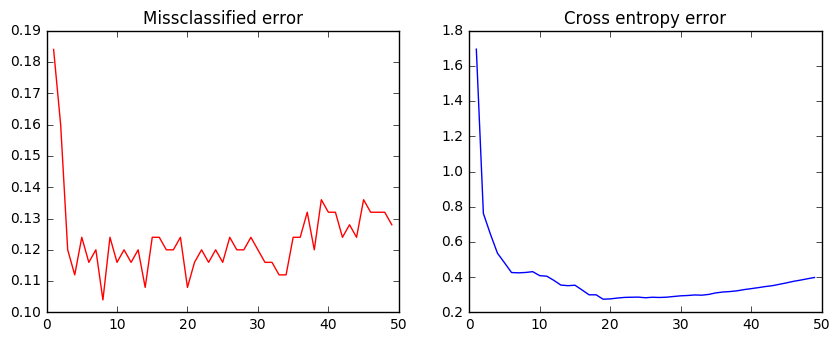

In [9]:
folder = KFold(len(ttr), n_folds=5, shuffle=True)

classifiedError, crossEntropyError = [], []

for k in range(1,50):
    
    kClassError, kCrossError = [], []
    
    for tra, val in folder:
        classError, crossError = knn(k,Xtr[tra],ttr[tra],Xtr[val],ttr[val])
        kClassError.append(classError)
        kCrossError.append(crossError)
    
    
    classifiedError.append(sum(kClassError)/len(kClassError))
    crossEntropyError.append(sum(kCrossError)/len(kCrossError))
    
classK = classifiedError.index(min(classifiedError)) + 1
crossK = crossEntropyError.index(min(crossEntropyError)) + 1

figure()
subplot(221)
title('Missclassified error')
plot(range(1,50), classifiedError , 'r-')

subplot(222)
title('Cross entropy error')
plot(range(1,50), crossEntropyError, 'b-')

## How does missclasification differ from cross entropy?

The missclassification error metric has a tendany to be volitile with its error values across the range of k since it doesn't factor in the degree of misclassification. Cross entropy's error values are relatively smooth due to haveing points slowly transitioning to the correct/incorrect class. Points that are "on the fence" equally don't dramatically punish the metric. 

They both have a similar trend in error which results in similar values of K being suggested. Missclassification erraticness does tend to give is the smaller value of the two however.

The missclassified error might be erratic but it's range is smaller and its values for error are a also smaller than the values for cross entropy error.

## What is the best k values?

In [10]:
print("When using Missclassification error, k is suggested to be:", classK)
print("When using Cross entropy error, k is suggested to be:", crossK)

When using Missclassification error, k is suggested to be: 8
When using Cross entropy error, k is suggested to be: 19


## What is the error rate for thoses k values?


In [11]:
testClassError = knn(classK, Xtr, ttr, Xte, tte )[0]
testCrossError = knn(crossK, Xtr, ttr, Xte, tte )[1]

print("Following MC's k we get an error on the test data of:", testClassError)
print("Following CE's k we get an error on the test data of:", testCrossError)


Following MC's k we get an error on the test data of: 0.106
Following CE's k we get an error on the test data of: 0.240065033338


## Plots of the decision boundaries

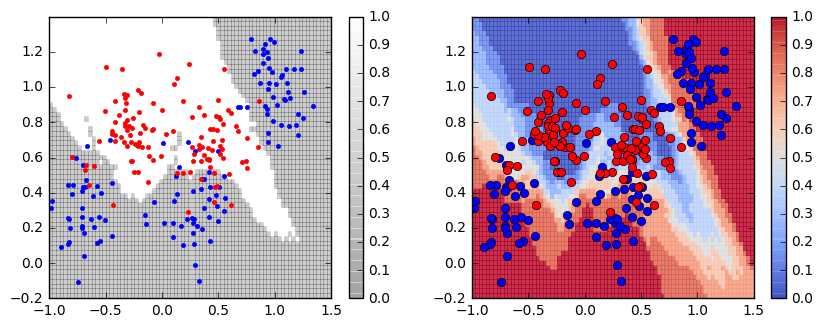

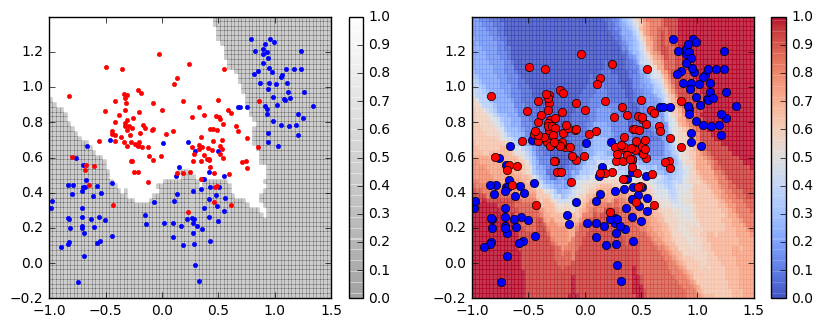

In [12]:
knn( classK, Xtr, ttr, display=True )
knn( crossK, Xtr, ttr, display=True )

## What can be said about k when it is small/large?

When k is small it is likely that the machine has overfitted the training data. Anomalies  that are found in areas that are heavily occupided by an oposing class have much more of an effect on the classification of data points in the area unduely . Alternatively when k becomes large, the machine begins to lose the ability to represent the underlying trend in the data. As K continues towards the number of training points, classification becomes simply a global popularity contest. 

## What is the effect of having less/more than 250 data points on k?

For a smaller dataset, a suggestion for K is: 14  For a larger dataset, a sugestion for k is: 30


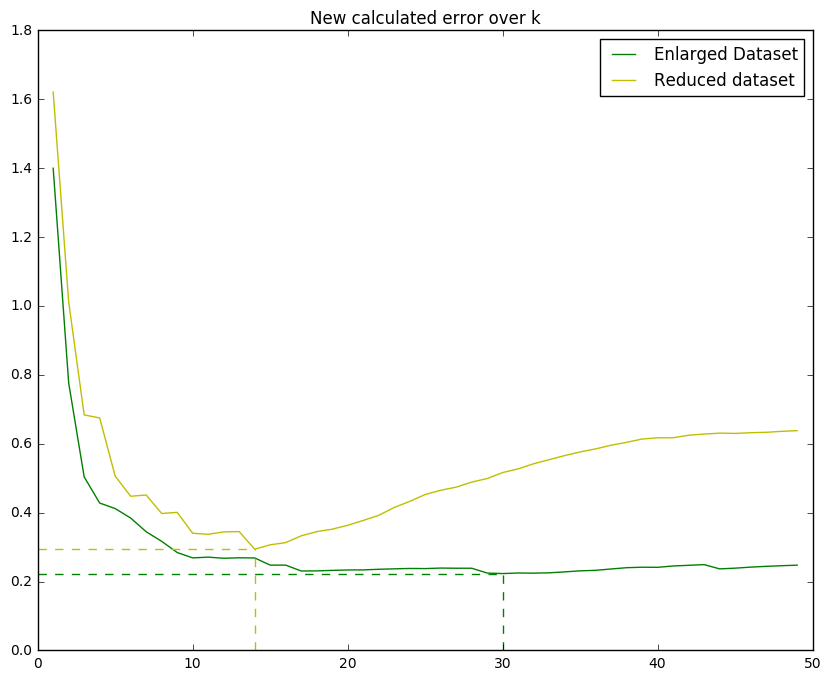

In [13]:
import random

# Randomly select half the datapoints.
permutation = list(range(len(Xtr)))
random.shuffle(permutation)
permutation = permutation[:len(Xtr)//2]

# Xtre - Enlarged, Xtrr - Reduced
Xtre, ttre = append(Xtr,Xte[permutation],axis=0), append(ttr,tte[permutation],axis=0)
Xtrr, ttrr = Xtr[permutation], ttr[permutation]

# Enlarged Error
folder = KFold(len(ttre), n_folds=5, shuffle=True)
enlarged = []
for k in range(1,50):
    kError = []
    for t,v in folder:
        i, e = knn(k,Xtre[t],ttre[t],Xtre[v],ttre[v])
        kError.append(e)
    enlarged.append( sum(kError)/len(kError))

# Reduced Error
folder = KFold(len(ttrr), n_folds=5, shuffle=True)
reduced = []
for k in range(1,50):
    kError = []
    for t, v in folder:
        ignore, e = knn(k,Xtrr[t],ttrr[t],Xtrr[v],ttrr[v])
        kError.append(e)
    reduced.append( sum(kError)/len(kError) )
    
enlargedK = enlarged.index(min(enlarged)) + 1
reducedK = reduced.index(min(reduced)) + 1
    
print("For a smaller dataset, a suggestion for K is:", reducedK, " For a larger dataset, a sugestion for k is:", enlargedK)
    
figure()
title('New calculated error over k')
plot(range(1,50), enlarged , 'g-', label="Enlarged Dataset")
plot([0,enlargedK], [min(enlarged)]*2, "g--")
plot([enlargedK]*2, [0, min(enlarged)], "g--")
plot(range(1,50), reduced, 'y-', label= "Reduced dataset")
plot([0,reducedK], [min(reduced)]*2, "y--")
plot([reducedK]*2, [0, min(reduced)], "y--")
legend()

The best way would be to observe more data points and use them within training, however this is difficult and cumbersome. As the aim is to understand the underlying trend in the data, an axiom is that we cannot produce datapoints ourselves. Alternatively we can reintroduce data points that we removed to form the testing set. However this will negativel effect the insight we can gain from applying the model to the testing set. It is prefered to keep the testing set roughly the same size of the training set.

In out case we have 250 data point in training and 1000 in testing, so it is quite reasonable to enact this method.

I would hypothesise that when the data is reduced the optimun value of K also decreases. I believe that having less data would translate naturally into a reduction in class density. This would mean that having a larger K would begin to incorrectly classify. With smaller amounts of data we would expect to see an increase in the error as we become less confident in the model.

Having a large amount of data would allow for a greater value of K, high density of datapoints would be able to give a strong indication of a class and anomilies will have less of an impact. The boundaries would equally be more defined and overally we would expect less error as the underlying trend is properly captured. 

## Classifying digits

Here you'll use the $k$ nearest neighbour classifier to distinguish between digits. You can load and plot a dataset of digit images as follows (keep executing the cell to see more digits)

(1797, 64)


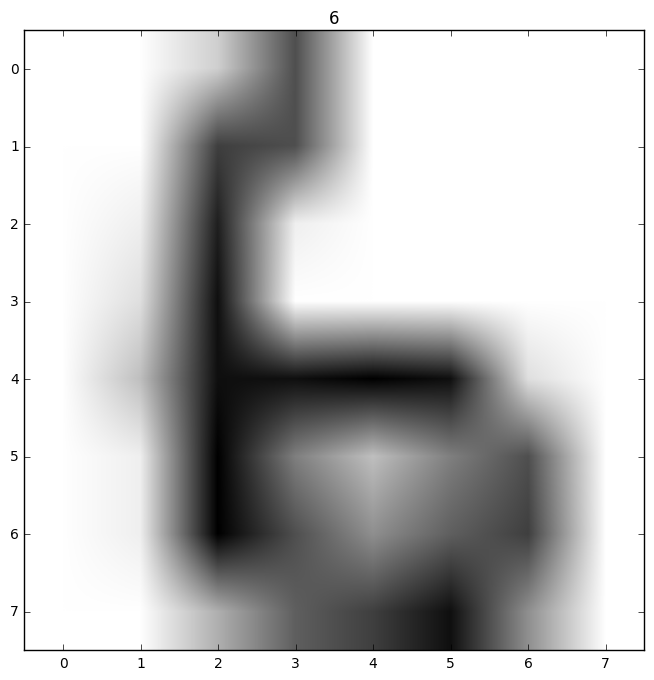

In [14]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
print(digits.data.shape)

# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0])
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r)
title("%d" % digits.target[j])

As you can see there are 1797 images arranged as 64-dimensional vectors. Choose two digits as the two classes that you'll use as the two classes and arrange them as a data and target matrix as follows.

In [15]:
mydigits = [0, 5]  # Choose your own!
I = np.logical_or(digits.target == mydigits[0], digits.target == mydigits[1])
X = digits.data[I,:]   # Features
# Make the targets 0 or 1 coresponding to the two classes
tmp = digits.target[I]
t = zeros(X.shape[0])
for i in (0,1):
    t[tmp == mydigits[i]] = i

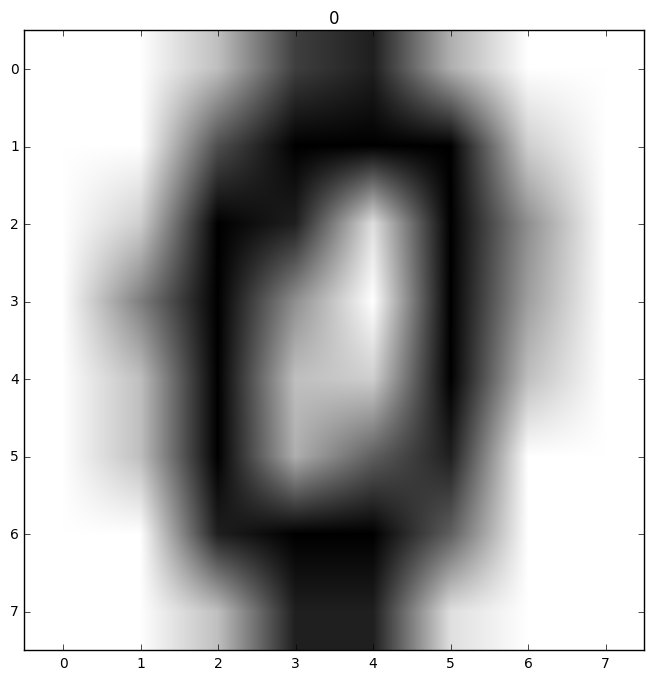

In [16]:
# Check the above: the title is now the class label, 0 or 1. 
# Re-execute to check that digits are labelled consistently
j = randint(len(t))
imshow(reshape(X[j], (8,8)), cmap=cm.gray_r)
title("%d" % t[j])

Use a k-nn classifier to classify the digits. To do this you will have to divide the data into a training set and a test set. You should then use cross validation to estimate the best value of $k$. 

You could divide the digits into training and test with something like the following:

    I = permutation(len(t))
    Itrain = I[:len(t)//2]   # First half of permuted indices for training
    Itest = I[len(t)//2:]    # Second half for test
        
    DigitTestX = X[Itest]
    DigitTestt = t[Itest]
    DigitTrainX = X[Itrain]
    DigitTraint = t[Itrain]

Since there are relatively few data, a better alternative would be to do k-fold testing; that is, divide the data into $k$ folds, train on $k-1$ of them and test on the remaining fold.  Repeat this $k$ times for all the folds and average the test error over the $k$ different folds.  Note that you will probably want to do $k$ fold cross validation on each *training set* (perhaps with a different $k$).

Whatever you do, make sure that the test data is not involved *in any way* in the training process.


In [17]:
import random

def get_digitData( digitOne, digitTwo ):
    I = np.logical_or(digits.target == digitOne, digits.target == digitTwo)
    X = digits.data[I,:]   # Features
    # Make the targets 0 or 1 coresponding to the two classes
    tmp = digits.target[I]
    t = zeros(X.shape[0])
    
    mydigits = [digitOne, digitTwo]
    for digit in (0,1):
        t[tmp == mydigits[i]] = i
        
    indexes = list(range(len(X)))
    random.shuffle(indexes)
    tra, tes = indexes[:len(indexes)//2], indexes[len(indexes)//2:]
    
    return X[tra], t[tra], X[tes], t[tes]

Suggested value for knn k:  4
Error on test set with suggested K: 0.0228671287645


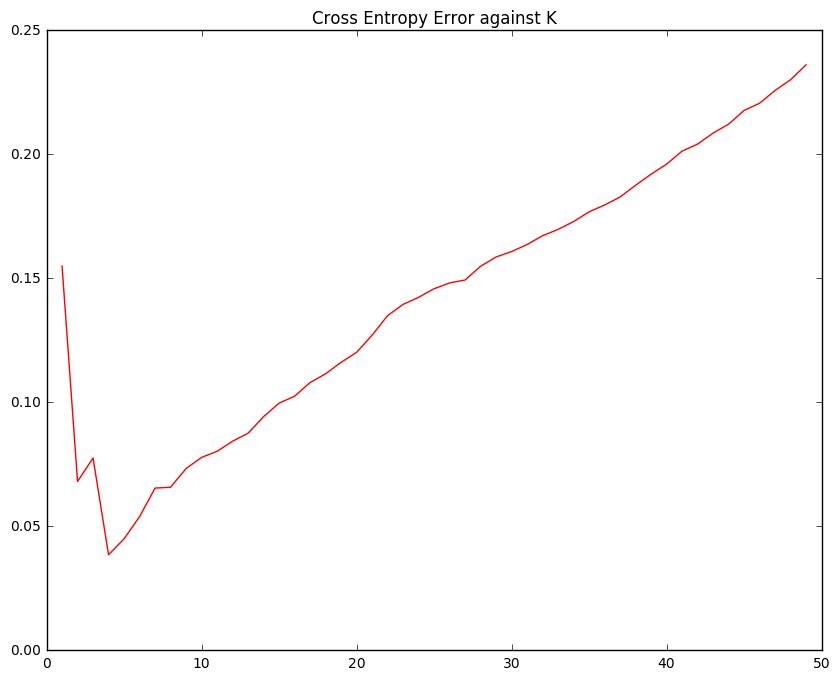

In [18]:
# Collect digit data.
DXtr, Dttr, DXte, Dtte = get_digitData(3,8)

# Leave one out folder.
folder = KFold(len(DXtr), n_folds=5, shuffle=True)

kError = []
for k in range(1,50):
    error = []
    for tra, val in folder:
        error.append(knn(k, DXtr[tra], Dttr[tra], DXtr[val], Dttr[val])[1])
    kError.append(sum(error)/len(error))

predictedK = kError.index(min(kError))+1    

print("Suggested value for knn k: ", predictedK)
print("Error on test set with suggested K:",knn(predictedK, DXtr, Dttr, DXte, Dtte)[1])

figure()
title("Cross Entropy Error against K")
plot(range(1,50),kError, "r-")

## Multi-layer perceptrons

Multi-layer perceptrons are the sorts of neural networks that have been described in lectures.  In this section we'll use an MLP with weight decay regularisation to classify the gmm5 data again. To make the problem a bit harder, we'll use a smaller amount of training data. 

(-1.0, 1.5, -0.20000000000000001, 1.4000000000000001)

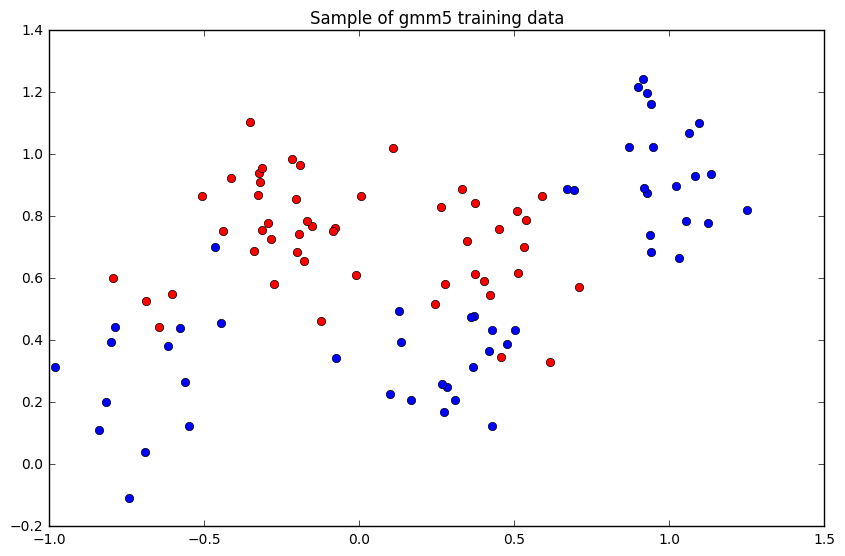

In [19]:
Xtr, ttr, Xte, tte = get_gmm5Data(sampleSize = 100)

figure()
title("Sample of gmm5 training data")
plot(Xtr[ttr==0, 0], Xtr[ttr==0, 1], 'bo')
plot(Xtr[ttr==1, 0], Xtr[ttr==1, 1], 'ro')
axis('scaled')

The next cell sets up an MLP with 5 hidden units and the given regularisation constant ($\alpha$), trains it a few times from random starting places to find the best minimum (because $E(\mathbf{w})$ may have local minima) and uses it to classify points on a grid as above.

(-1.0, 1.5, -0.20000000000000001, 1.3999999999999999)

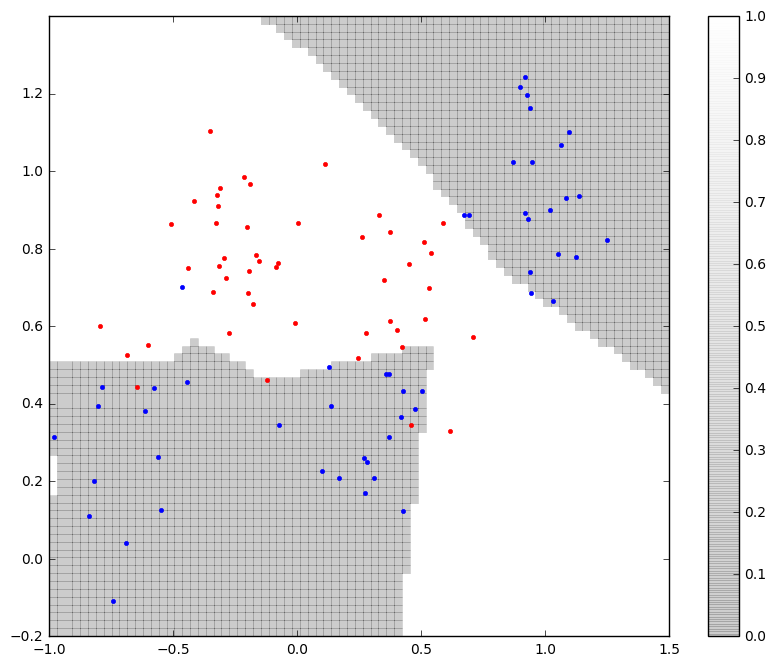

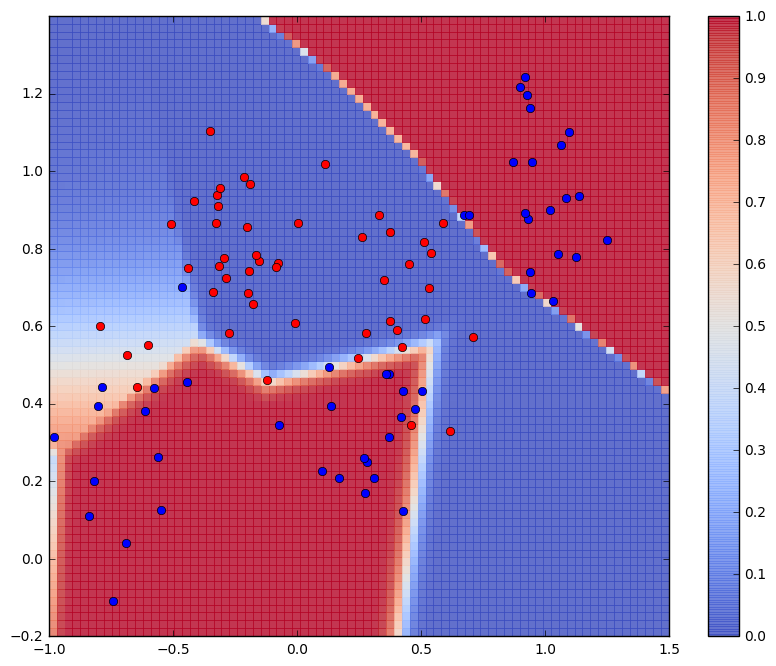

In [20]:
from sklearn.neural_network import MLPClassifier

Ebest = Inf
for n in range(10):
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,))
    mlp.fit(Xtr, ttr)
    if mlp.loss_ < Ebest:
        mlpbest = mlp
        Ebest = mlp.loss_
        
mlp = mlpbest

N, M = 80, 80   # Make these larger to get a smoother picture

X = linspace(-1.0, 1.5, N)
Y = linspace(-0.2, 1.4, M)
pred = zeros((M,N))
prob = zeros((M,N,2))

for ny, y in enumerate(Y):
    for nx, x in enumerate(X):
        pred[ny, nx] = mlp.predict([[x, y]])          # Predict expects a matrix of features
        prob[ny, nx, :] = mlp.predict_proba([[x, y]]) # Probabilities of belonging to one class
pcolor(X, Y, pred, cmap=cm.gray, alpha=0.2)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
axis('tight')

# Plot the probabilites of belonging to the 1 class.
figure()
pcolor(X, Y, prob[:,:,0], cmap=cm.coolwarm, alpha=0.8)
colorbar()
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'bo')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'ro')
axis('tight')

Experiment with different values of the regularisation constant, plotting the decision boundaries to visualise how the regularisation forces a smooth or more wiggly boundary.  Remember to vary $\alpha$ on a logarithmic scale and it could range between $10^{-16}$ (effectively 0) and $1$. 

In [21]:
def mlp(alpha, data, targets, pred_data = None, pred_targets = None, solver='lbfgs', network=(8,), display=False):
    
    loss = Inf
    machine = None
    for i in range(5):
        mlp = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=network)
        mlp.fit(data, targets)
        if mlp.loss_ < loss:
            machine = mlp
            loss = mlp.loss_
    
    if display:
        N, M = 80, 80   # Make these larger to get a smoother picture

        X = linspace(-1.0, 1.5, N)
        Y = linspace(-0.2, 1.4, M)
        pred = zeros((M,N))
        prob = zeros((M,N,2))

        for ny, y in enumerate(Y):
            for nx, x in enumerate(X):
                prob[ny, nx, :] = machine.predict_proba([[x, y]]) # Probabilities of belonging to one class

        # Plot the probabilites of belonging to the 1 class.
        figure()
        title("Boundary box for alpha value: " + str(alpha) )
        pcolor(X, Y, prob[:,:,0], cmap=cm.coolwarm, alpha=0.8)
        colorbar()
        plot(data[targets==0,0], data[targets==0,1], 'bo')
        plot(data[targets==1,0], data[targets==1,1], 'ro')
        axis('tight')
    
    if pred_data is not None and pred_targets is not None:
        probability = machine.predict(pred_data)
        
        error = 0
        for prob, target in zip(probability, pred_targets):
            #c0, c1 = prob
            c0, c1 = prob, 1-prob
            c0 = c0 if c0 else 0.000001
            c1 = c1 if c1 else 0.000001
            error -= target*log(c0) + (1-target)*log(c1)
            
        return error/len(pred_data)
    
    return machine.loss_

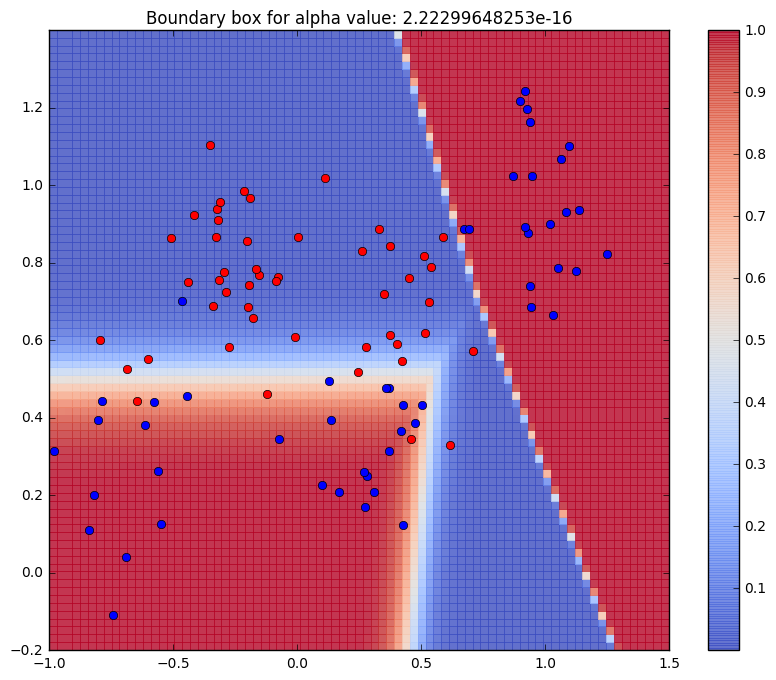

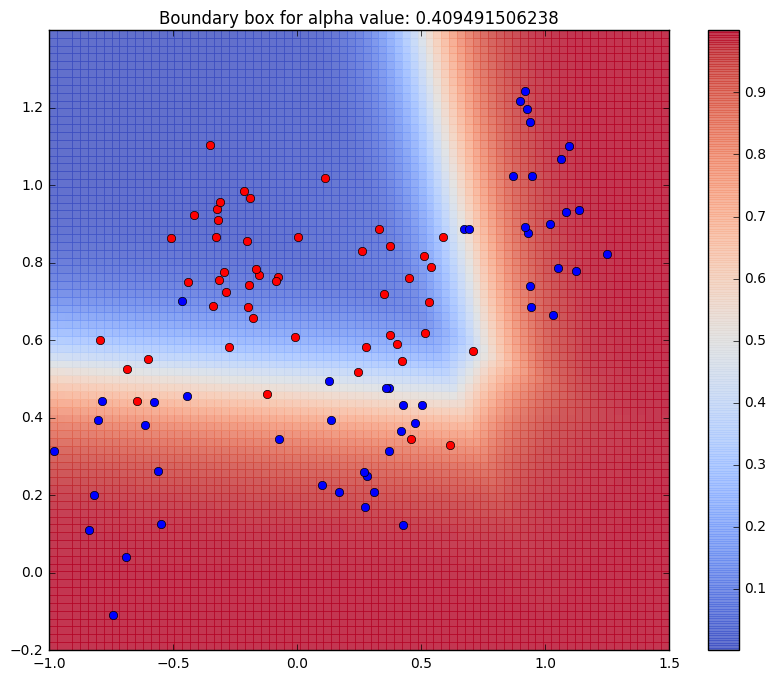

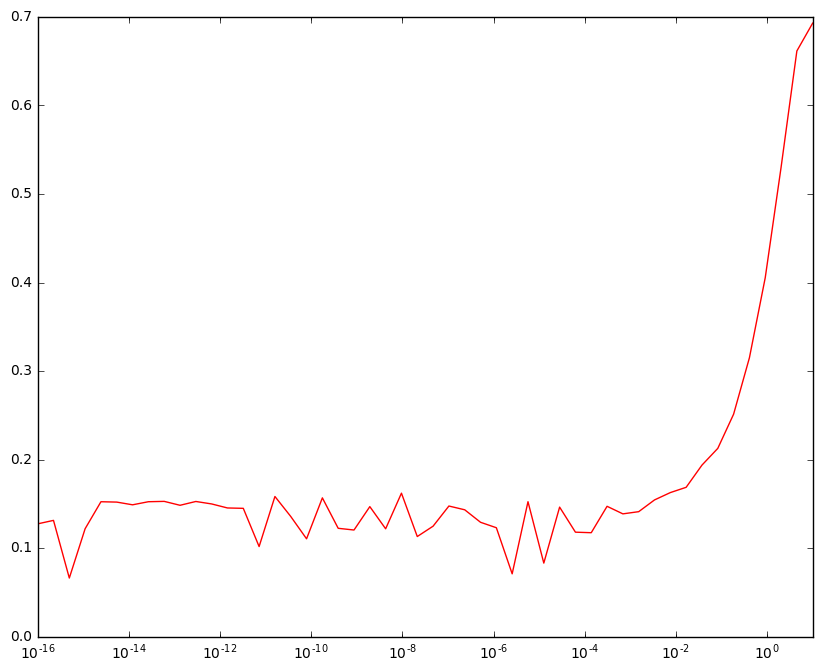

In [22]:
# Values for alpha from 10^-16 to 10^1
alphaList = logspace(-16,1,50)

# Display sharpness trend.
[mlp(alphaList[i], Xtr, ttr, display=True) for i in [1,45]]

# MLP loss values over alphatrend.
figure()
plot(alphaList, [mlp(alpha, Xtr, ttr) for alpha in alphaList], "r-")
xscale("log")

Use cross-validation to choose the best value of the regularisation constant for these data.   Plot the training and validation data errors versus $\alpha$.  How well does the validation error correspond to the actual test error?

In [23]:
# Re-introduce entire dataset
Xtr, ttr, Xte, tte = get_gmm5Data()

The suggested values for Alpha are
	Validation: 0.0828642772855 
	Test 2.5595479227e-06


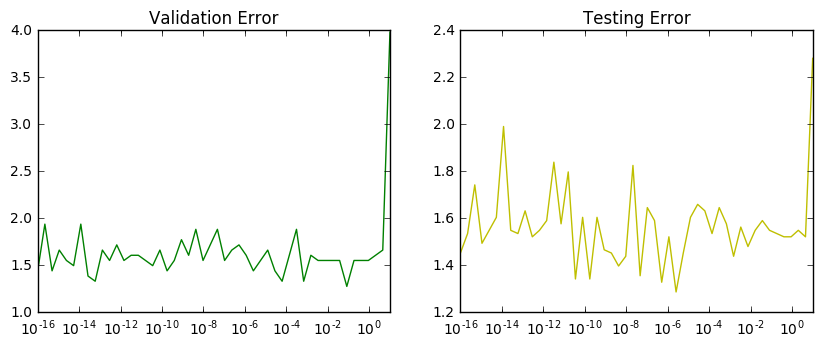

In [24]:
# Choosing best alpha
folder = KFold(len(Xtr), n_folds=5, shuffle=True)

validationError, testError = [], []
for a in alphaList:
    # Validation testing
    foldError = [mlp(a, Xtr[tra], ttr[tra], Xtr[val], ttr[val]) for tra, val in folder]
    validationError.append( sum(foldError)/len(foldError) )
    
    #Test error
    testError.append(mlp(a, Xtr, ttr, Xte, tte) )   

valAlpha = alphaList[validationError.index( min(validationError))]
testAlpha = alphaList[testError.index(min(testError))]

print("The suggested values for Alpha are\n\tValidation:", valAlpha,"\n\tTest",testAlpha)
figure()
subplot(221)
title("Validation Error")
plot(alphaList,validationError, "g-")
xscale("log")

subplot(222)
title("Testing Error")
plot(alphaList,testError, "y-")
xscale("log")

Bonus question:  How should the best value of $\alpha$ vary as the number of training examples is increased? Why? Can you test it? 

As the number of observations increase, the reliance on the regularisation constant should decrease. The regularisation constant acts in part like a prior distribution, guiding the machine towards the true nature of the data. As more and more data points are introduced the random component to the data tends to effectly cancel itself out in a manner of speaking.

### Digits

Use an MLP to classify two of the digits as you did for the k-nearest neighbours classifier.  Since the images are $8 \times 8$, the feature vector will have length 64.  I suggest using roughly 20 hidden units and you will need to use cross validation to regularise the network effectively. 

In [25]:
alphaRange = logspace(-16,1,40) # Declaring the range of Alpha
networkRange = range(10,31,1)   # Declaring the range of network sizes.

# K Fold set up.
folder = KFold(len(DXtr), n_folds=5, shuffle=True)

alphaError = [] # Error list of lists of network error with alpha
for alpha in alphaRange:
    
    networkError = [] # Errors for network range
    for network in networkRange:
        
        # Construct a list of errors for each fold iteration
        foldError = [mlp(alpha, DXtr[t], Dttr[t], DXtr[v],Dttr[v], network=(network,)) for t,v in folder]
        # Record average error
        networkError.append(sum(foldError)/len(foldError))

    # Record errors for all networks against alpha
    alphaError.append(networkError)
    
# Find the minimum
smallestError = Inf
a, s = 0, 0 # Alpha and Size values.
for i, v in enumerate(alphaError):
    if min(v) < smallestError:
        smallestError = min(v)
        a, s = i, v.index(min(v))

print("The best Alpha has been found to be:", alphaRange[a])
print("The best network size has been found to be:", networkRange[s])
print("Error on MLP for alpha and network:", smallestError)

The best Alpha has been found to be: 2.72833337649e-16
The best network size has been found to be: 29
Error on MLP for alpha and network: 0.0


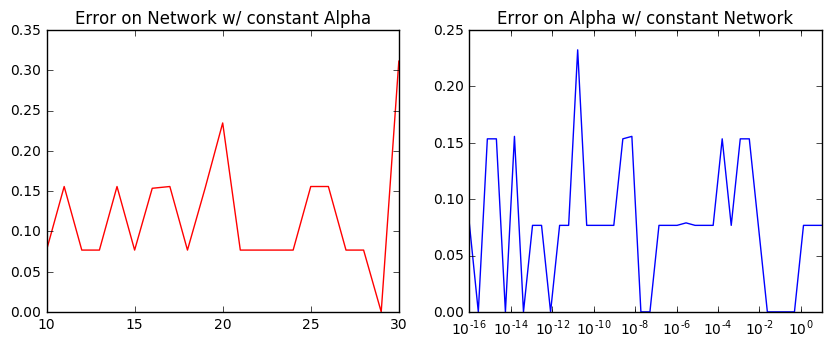

In [26]:
# Plot the affect of Network size on best alpha:
figure()
subplot(221)
title("Error on Network w/ constant Alpha")
plot(networkRange, alphaError[a], 'r-')

# Plot the affect of alpha size on best network:
subplot(222)
title("Error on Alpha w/ constant Network")
plot(alphaRange, [network[s] for network in alphaError], 'b-')
xscale("log")

## Support Vector Machines

Support vector machines (SVMs) are popular and powerful classifiers.  We'll deal with them in detail later in the module.  In the following you will use SVMs with both a "linear kernel" and with a RBF kernel.  With a linear kernel the SVM can only separate the classes with a straight line or a (hyper)plane, but an RBF kernel is nonlinear and allows the SVM to generate curved decision boundaries.  

We'll use the gmm5 data so that we can plot the decision boundaries, etc, and then apply it to the digit classification problem.  

Get the data again in case it's been overwritten in the meantime. 

In [27]:
Xtr, ttr, Xte, tte = get_gmm5Data(sampleSize=100)

We'll use the support vector machines in scikit learn.  Here's an example of training a SVM using a linear kernel (i.e., no non-linearity).

Shape of xy is (1200, 2)


(-1.0, 1.5, -0.20000000000000001, 1.3999999999999999)

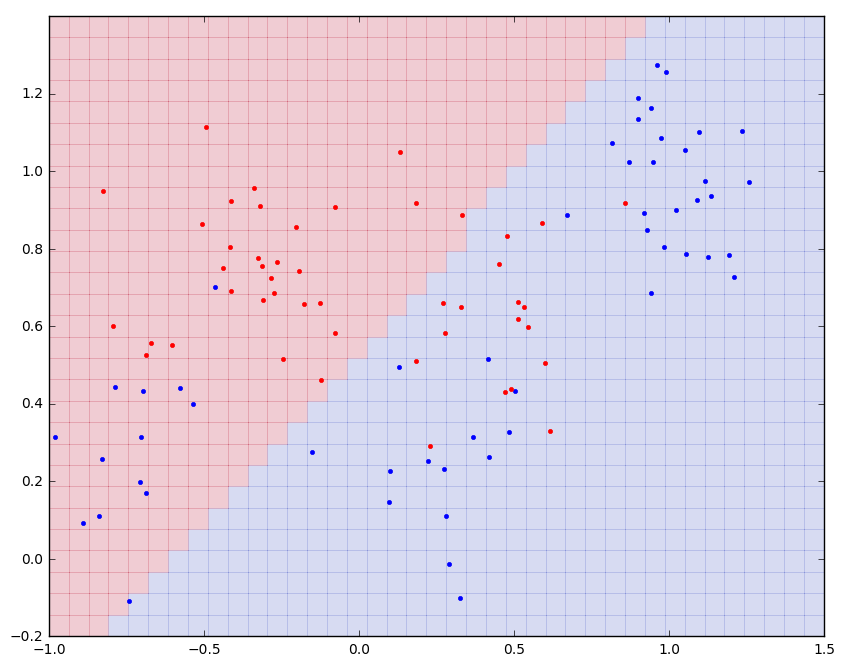

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')            # SVM with a linear kernel
svm.fit(Xtr, ttr)                     # Train it on the training data

# Plot the predictions (the two classes) for data on a grid and the discriminant 
# function which is the distance from the decision plane
N = 40
M = 30
X = linspace(-1.0, 1.5, N)
Y = linspace(-0.2, 1.4, M)
XX, YY = meshgrid(X, Y)

pred = zeros((M,N))

# The following using meshgrid is a quick way of arranging all the 
# (x, y) grid points in a matrix so that they can be classified in one go. 
xx, yy = np.meshgrid(X, Y)
xy = np.c_[xx.ravel(), yy.ravel()]

xy = vstack((XX.flat, YY.flat)).T
print('Shape of xy is', xy.shape)

pred = svm.predict(xy)
pred = reshape(pred, (M,N))

pcolor(X, Y, pred, cmap=cm.coolwarm, alpha=0.2)
plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
axis('tight')


In [29]:
def svm(x, xt, v = None, vt = None, kernel='rbf', C=1, gamma=0.1, display = False):

    svm = SVC(kernel=kernel, probability=True)
    svm.fit(x, xt)
        
    if display:
        # Plot the predictions (the two classes) for data on a grid and the discriminant 
        # function which is the distance from the decision plane
        N = 40
        M = 30
        X = linspace(-1.0, 1.5, N)
        Y = linspace(-0.2, 1.4, M)
        XX, YY = meshgrid(X, Y)

        pred = zeros((M,N))

        # The following using meshgrid is a quick way of arranging all the 
        # (x, y) grid points in a matrix so that they can be classified in one go. 
        xx, yy = np.meshgrid(X, Y)
        xy = np.c_[xx.ravel(), yy.ravel()]

        xy = vstack((XX.flat, YY.flat)).T

        pred = svm.predict(xy)
        pred = reshape(pred, (M,N))

        figure()
        pcolor(X, Y, pred, cmap=cm.coolwarm, alpha=0.2)
        plot(Xtr[ttr==0,0], Xtr[ttr==0,1], 'b.')
        plot(Xtr[ttr==1,0], Xtr[ttr==1,1], 'r.')
        axis('tight')
        
        return
    
    prob = svm.predict_proba(v)
    
    error = 0
    for i, prob_tuple in enumerate(prob):
        c0, c1 = prob_tuple
        target = vt[i]
        
        c0 = c0 if c0 else 0.00000001
        c1 = c1 if c1 else 0.00000001
        
        error -= (target)*log(c0) + (1-target)*log(c1)
        
    return error/len(v)

Now use the SVM with <code>kernel='rbf'</code> to classify the data, but with a non-linear mapping so that the decision boundary can be non-linear. 

In this case the SVM has two additional parameters $C > 0$ and $\gamma$.  $C$ is a regularisation constant that controls how strongly points that lie on the wrong side of the decision boundary are penalised.  When $C$ is large, they are heavily penalised which results in the boundary being flexible, but when it is small they are lightly penalised so the boundary tends to be straighter.  You can set the value of $C$ (and $\gamma$) with

        svm = SVC(kernel='rbf', C=1, gamma=0.1) 

The default value of $C$ is 1 and the default value of $\gamma$ is 0.1.

The $\gamma$ parameter controls the width of the RBF kernel, that is how close training samples must be to interact with each other.  When $\gamma$ is large the training samples must be close to interact and the decision boundary tends to be nonlinear, whereas when $\gamma$ is small it tends to be smooth.

Use cross validation on the *training* data to choose the best value of $C$ and $\gamma$.  Try a few values of $C$ and $\gamma$ by hand first of all to find appropriate ranges and it will  be best to vary them on a logrithmic scale.  You may care to investigate and use the sklearn helper functions for searching a grid of values for the best cross validation value: see <http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#example-svm-plot-rbf-parameters-py> or write your own!

What is the resulting accuracy on the test data and the best decision boundary?

For RBF svm:
 	Gamma value: 5.87801607227e-05 
	C value: 0.0119377664171


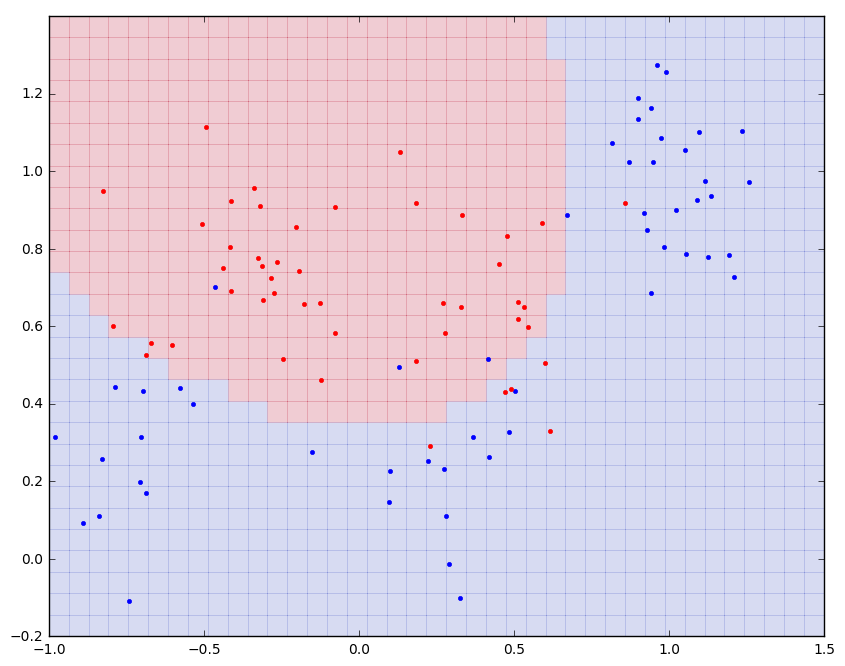

In [30]:
gammaRange = logspace(-40,5,40) # Declaring gamma range
CRange = logspace(-40,5,40)     # Declaring C range

# K fold definition
folder = KFold(len(Xtr), n_folds=5, shuffle=True)

gError = []
for gamma in gammaRange:
    cError = []
    for C in CRange:
        # Collect cross validation error on SVM
        errors = [svm(Xtr[t], ttr[t], Xtr[v], ttr[v], gamma=gamma, C=C) for t,v in folder]
        cError.append(sum(errors)/len(errors))
    gError.append(cError)
    
minError, gamma, C = Inf, 0, 0
for i, g in enumerate(gError):
    if min(g) < minError:
        minError = min(g)
        gamma = i
        C = g.index(min(g))
        
gammaValue = gammaRange[gamma]
CValue = CRange[C]

print("For RBF svm:\n", "\tGamma value:", gammaValue,"\n\tC value:", CValue)
svm(Xtr, ttr, gamma=gammaValue, C=CValue, display=True)

In [31]:
testError = svm(Xtr, ttr, Xte, tte, gamma=gammaValue, C = CValue)
print("Testing error for SVM:", testError)

Testing error for SVM: 2.29638984664


### Digit data again

Use linear and RBF kernel SVMs to classify the same digits of the image data, using cross validation again to find the best parameters.  You should be able to do a lot of cutting and pasting from earlier code!

For a linear kernel, best values were:
	Gamma 2.0309176209e-23
	C 1e-10
For a rbf kernel, best values were:
	Gamma 34.5510729459
	C 5.87801607227e-05


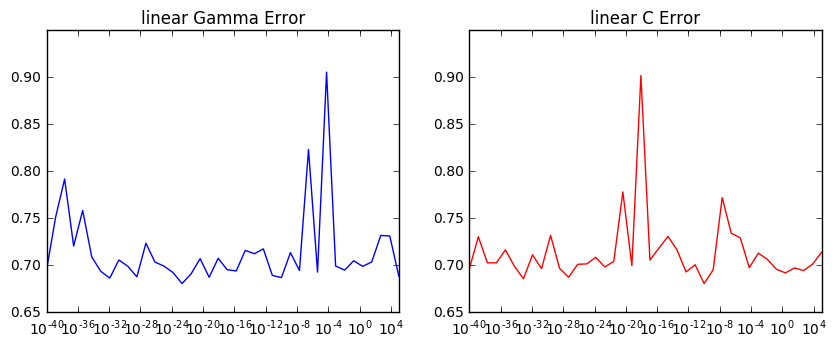

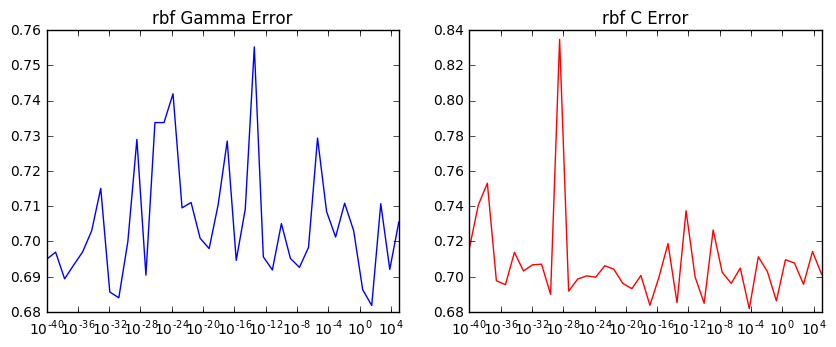

In [32]:
gammaRange = logspace(-40,5,40) # Declaring gamma range
CRange = logspace(-40,5,40)     # Declaring C range

# K fold definition
folder = KFold(len(DXtr), n_folds=5, shuffle=True)
kError = []
for kernel in ["linear", "rbf"]:
    gError = []
    for gamma in gammaRange:
        cError = []
        for C in CRange:
            # Collect cross validation error on SVM
            errors = [svm(DXtr[t], Dttr[t], DXtr[v], Dttr[v], gamma=gamma, C=C) for t,v in folder]
            cError.append(sum(errors)/len(errors))
            
        gError.append(cError)
    kError.append(gError)
    


for kernelTitle, kernel in zip(["linear", "rbf"], kError):
    
    minError, gammaIndex, cIndex = Inf, Inf, Inf
    
    for index, g in enumerate(kernel):
        if min(g) < minError:
            minError = min(g)
            gammaIndex, cIndex = index, g.index(min(g))
            
    print("For a", kernelTitle, "kernel, best values were:")
    print("\tGamma", gammaRange[gammaIndex])
    print("\tC", CRange[cIndex])
    
    figure()     
    subplot(221)
    title(kernelTitle + " Gamma Error")
    plot(gammaRange, [clist[cIndex] for clist in kernel], "b-",)
    xscale("log")
    
    subplot(222)
    title(kernelTitle + " C Error")
    plot(CRange, kernel[gammaIndex], "r-")
    xscale("log")